## This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/alexnet/fashion_mnist/'
data_path2 = parent_path / 'Data/alexnet/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /root/GreenAI/Cloud/4090/code
The parent path is: /root/GreenAI/Cloud/4090
The data path is: /root/GreenAI/Cloud/4090/Data/alexnet/fashion_mnist
The data path is: /root/GreenAI/Cloud/4090/Data/alexnet/cifar100


### extract data

In [3]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [4]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E10_B64_R0', 'E10_B64_R1', 'E10_B64_R2', 'E10_B128_R0', 'E10_B128_R1', 'E10_B128_R2', 'E10_B256_R0', 'E10_B256_R1', 'E10_B256_R2', 'E10_B512_R0', 'E10_B512_R1', 'E10_B512_R2', 'E20_B64_R0', 'E20_B64_R1', 'E20_B64_R2', 'E20_B128_R0', 'E20_B128_R1', 'E20_B128_R2', 'E20_B256_R1', 'E20_B256_R2', 'E20_B512_R0', 'E20_B512_R1', 'E20_B512_R2', 'E30_B64_R0', 'E30_B64_R1', 'E30_B64_R2', 'E30_B128_R0', 'E30_B128_R1', 'E30_B128_R2', 'E30_B256_R0', 'E30_B256_R1', 'E30_B256_R2', 'E30_B512_R0', 'E30_B512_R1', 'E30_B512_R2', 'E40_B64_R0', 'E40_B64_R1', 'E40_B64_R2', 'E40_B128_R0', 'E40_B128_R1', 'E40_B128_R2', 'E40_B256_R0', 'E40_B256_R1', 'E40_B256_R2', 'E40_B512_R0', 'E40_B512_R1', 'E40_B512_R2', 'E50_B64_R0', 'E50_B64_R1', 'E50_B64_R2', 'E50_B128_R0', 'E50_B128_R1', 'E50_B128_R2', 'E50_B256_R0', 'E50_B256_R1', 'E50_B256_R2', 'E50_B512_R0', 'E50_B512_R1', 'E50_B512_R2', 'E10_B1024_R0', 'E10_B2048_R0', 'E20_B1024_R0', 'E20_B2048_R0', 'E30_B1024_R0', 'E30_B2048_R0', 'E40_B1024_

### analysis data

#### find the data in same epoch and batch size

In [5]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /root/GreenAI/Cloud/4090/Data/alexnet/fashion_mnist/E20_B256_R0 /root/GreenAI/Cloud/4090/Data/alexnet/cifar100/E20_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy'] 
 ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy']


In [6]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [7]:
LayersName = ['AdaptiveAvgPool2d', 'Conv2d', 'Dropout', 'Flatten', 'Linear', 'MaxPool2d', 'ReLU']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 7


##### fashionMNIST

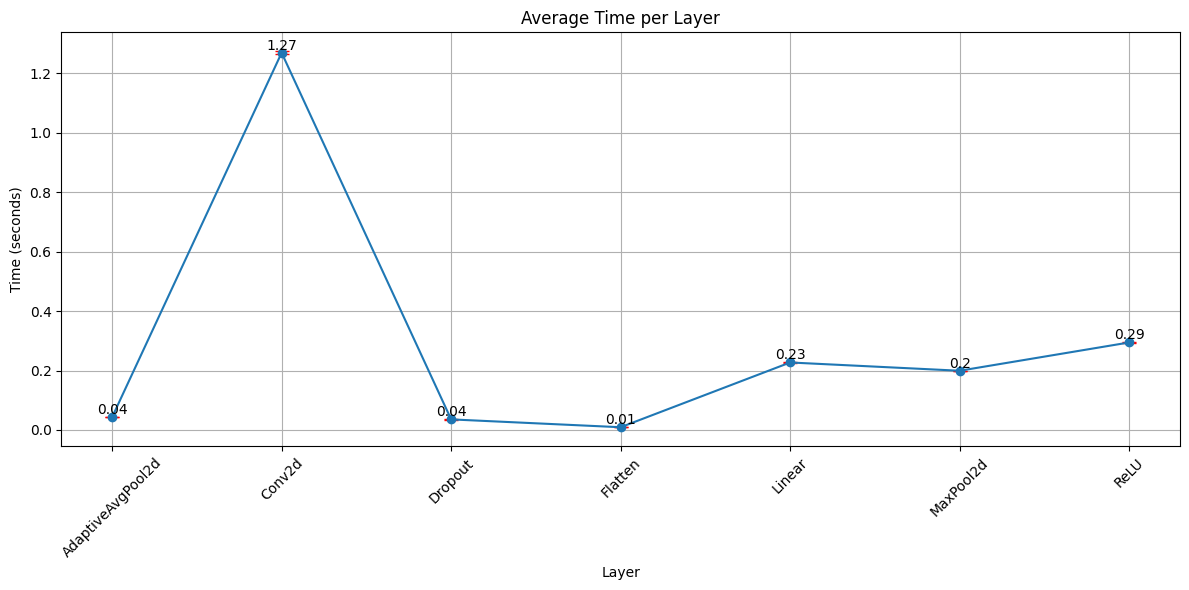

In [8]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

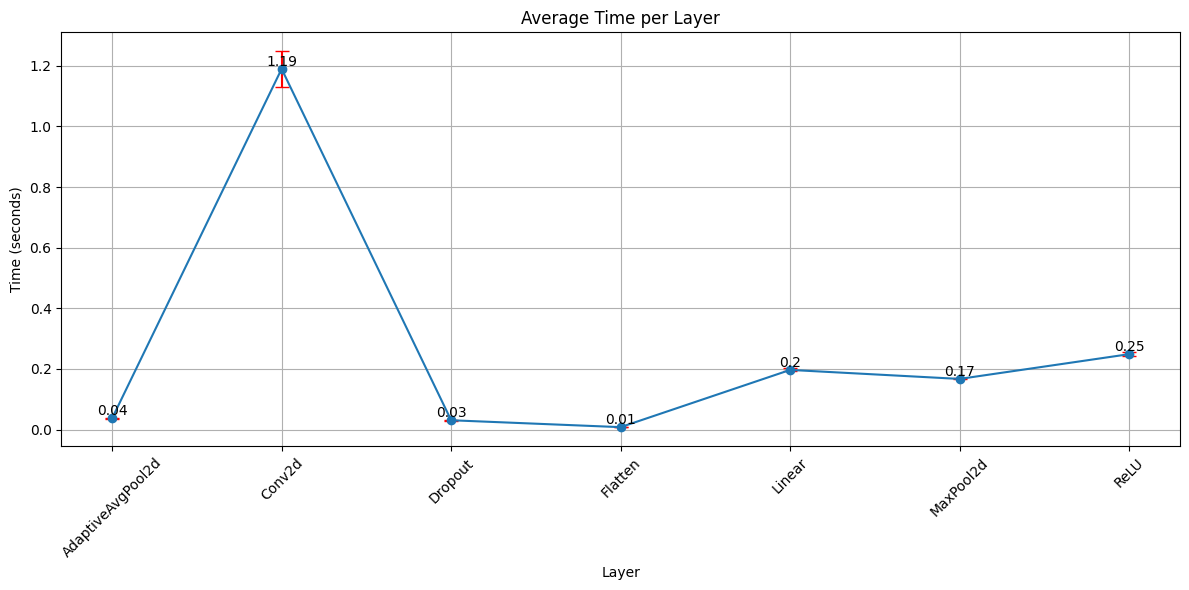

In [9]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [10]:
TrainPartName = ['TimeToDevice', 'Forward', 'Loss', 'Backward', 'Optimization', 'Test']

##### fashionMNIST

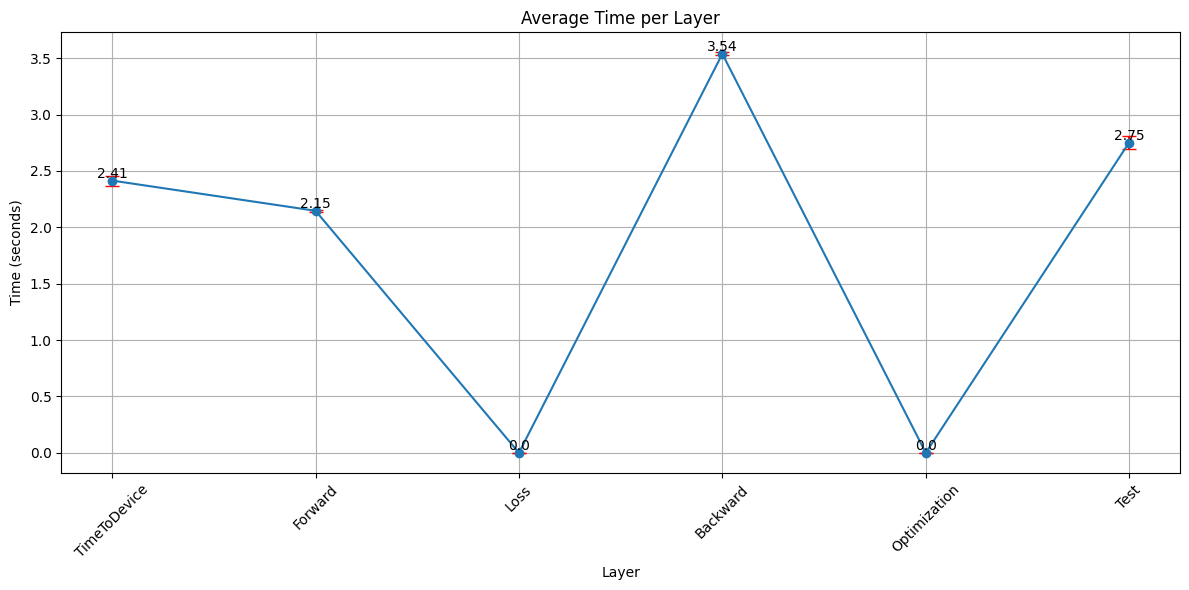

In [11]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

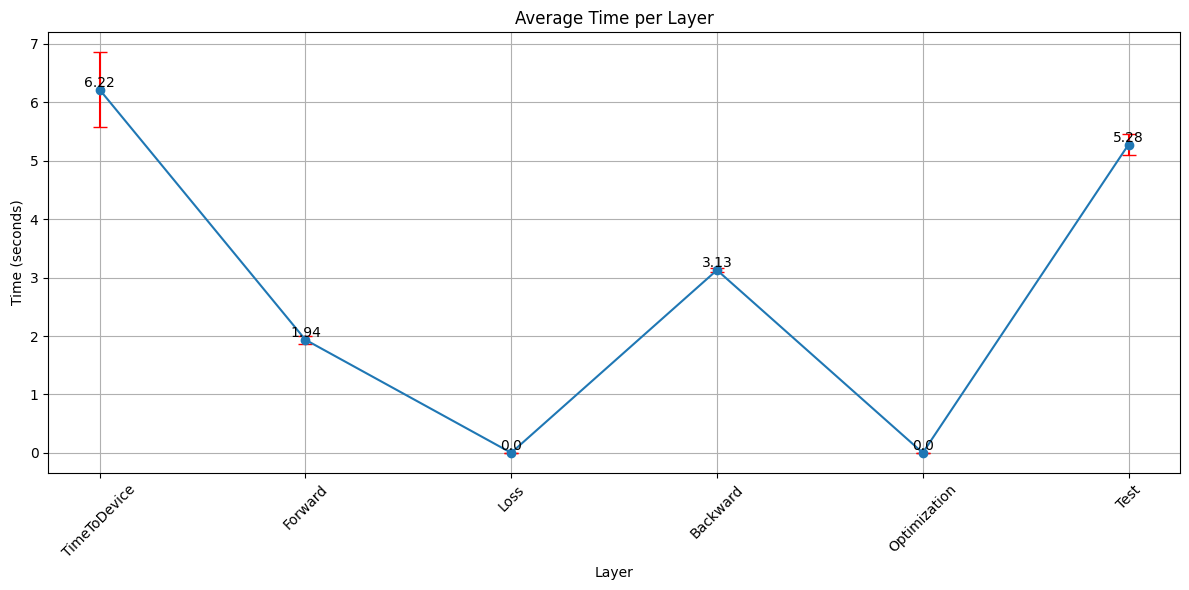

In [12]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [13]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [14]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

The total energy per epoch is: [[2660.77 2747.93 2845.42 2865.08 2864.09 2785.9  2894.24 2785.49 2799.46
  2820.78 2897.93 2892.19 2895.91 2808.63 2807.04 2816.64 2798.63 2881.04
  2899.7  2804.88]]
The average energy per epoch is: [[156.52 171.75 167.38 168.53 168.48 174.12 170.25 174.09 174.97 176.3
  170.47 170.13 170.35 175.54 175.44 176.04 174.91 169.47 170.57 175.3 ]]


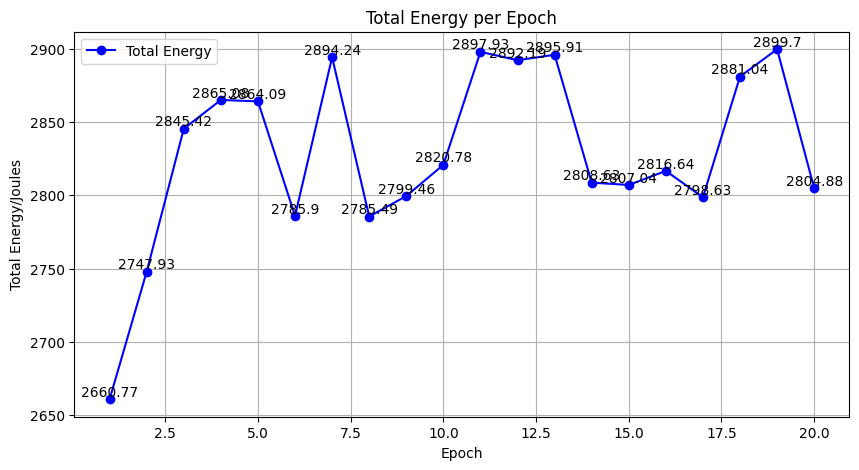

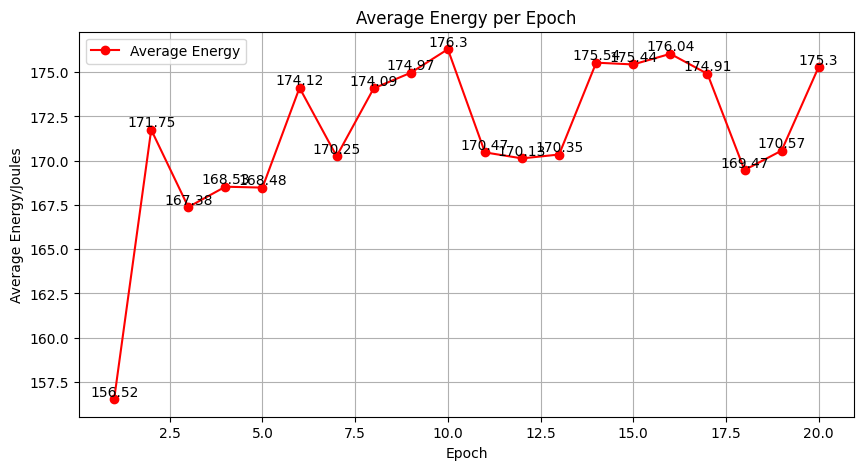

In [15]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [16]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 2828.5874999999996, the standard deviation is: 59.20393288245298


In [17]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 171.5305, the standard deviation is: 4.457279972135472


##### cifar100 

In [18]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [19]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[3012.22 3281.8  2983.59 3140.7  3082.47 3215.8  3281.62 3225.58 3166.18
  3203.63 3221.27 3137.92 3202.88 3230.46 3088.58 3071.04 3134.42 3117.01
  3077.97 3085.17]]
The average energy per epoch is: [[111.56 113.17 110.5  108.3  118.56 123.68 126.22 124.06  98.94 114.42
  128.85 120.69 118.63 111.4  118.79 113.74 111.94 103.9  109.93 114.27]]


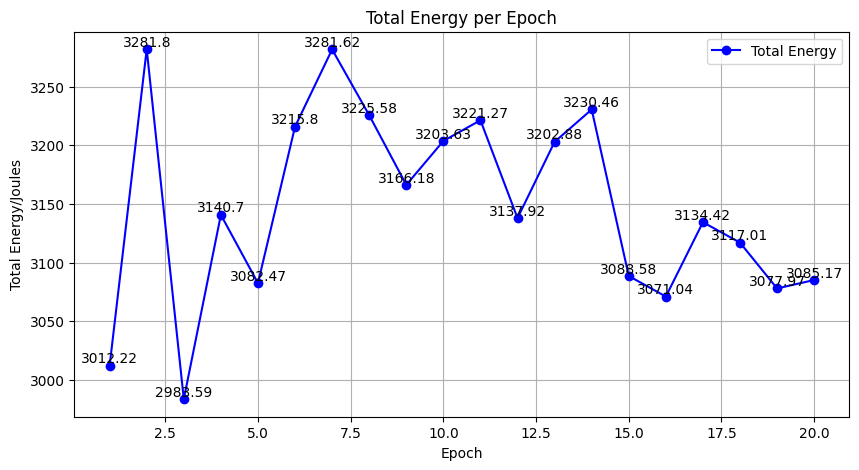

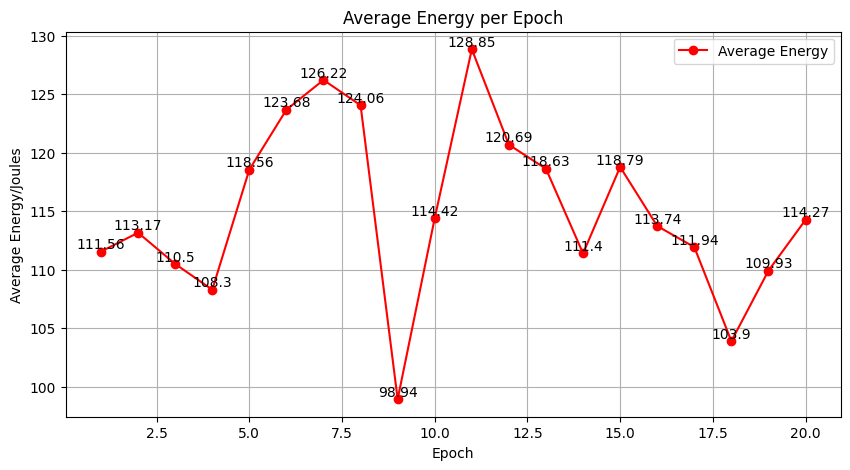

In [20]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

#### EpochTime

##### fashionMNIST

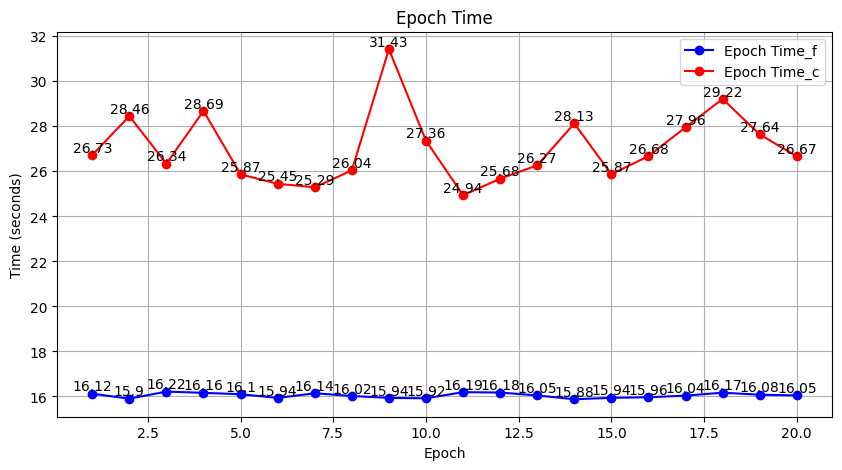

In [21]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [22]:
EpochTime_f

array([16.1226418 , 15.90182543, 16.21653676, 16.16072869, 16.09977365,
       15.93501973, 16.14286828, 16.02200246, 15.93635011, 15.91868806,
       16.19035053, 16.17606211, 16.04550934, 15.8777523 , 15.93956614,
       15.96421909, 16.03744316, 16.16816115, 16.07716656, 16.04760528])

##### cifar100

In [23]:
EpochTime_c

array([26.72509313, 28.45524836, 26.34243011, 28.68646216, 25.86816072,
       25.44828725, 25.29361272, 26.04469967, 31.4274087 , 27.36340165,
       24.93941331, 25.67513394, 26.26806617, 28.12793612, 25.87335134,
       26.67859745, 27.95652509, 29.21779346, 27.64446998, 26.66655064])